In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daily

In [4]:
dates_index = pd.date_range(start = '2019-01-01', end = '2021-03-02')

In [5]:
dates_index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
               '2021-03-01', '2021-03-02'],
              dtype='datetime64[ns]', length=792, freq='D')

### Sin ans cos

In [40]:
sin_time_series = []

for i in range(50, 1000, 25):
    sin_time_series.append(np.sin(np.linspace(0, i, len(dates_index))))

In [41]:
len(sin_time_series)

38

In [52]:
sin_time_series_scaled = []

for ts in sin_time_series:
    for scale in [0.01, 0.5, 1, 5, 100]:
        sin_time_series_scaled.append(ts*scale)


In [50]:
len(sin_time_series_scaled)

190

In [75]:
sin_time_series_noisy = []

for ts in sin_time_series_scaled:
    noise = np.random.randn(len(dates_index)) * np.std(ts) * 0.5
    sin_time_series_noisy.append(ts + noise)

In [86]:
sin_time_series_noisy_trended = []

for ts in sin_time_series_noisy:
    sin_time_series_noisy_trended.append(ts + np.linspace(0, np.max(ts)*3, len(dates_index)))

In [166]:
first = np.linspace(0, np.max(ts), int(len(dates_index)*0.2))
second = np.linspace(first[-1], -np.max(ts)*2, int(len(dates_index)*0.2))
third = np.linspace(second[-1], np.max(ts)*5, int(len(dates_index)*0.6))

In [169]:
second = np.linspace(first[-1], -np.max(ts)*2, int(len(dates_index)*0.2))
third = np.linspace(second[-1], np.max(ts)*5, int(len(dates_index)*0.6))

In [171]:
third = np.linspace(second[-1], np.max(ts)*5, int(len(dates_index)*0.6))

In [179]:
sin_time_series_noisy_piecewise_trended = []

for ts in np.array(sin_time_series_noisy)[[0, 10, 30, 50, 100, 150, 189]]:
    first = np.linspace(0, np.max(ts)*4, int(len(dates_index)*0.2))
    second = np.linspace(first[-1], -np.max(ts)*2, int(len(dates_index)*0.2))
    third = np.linspace(second[-1], np.max(ts)*5, int(len(dates_index)*0.6)+1)
    
    sin_time_series_noisy_piecewise_trended.append(ts + np.hstack([first, second, third]))

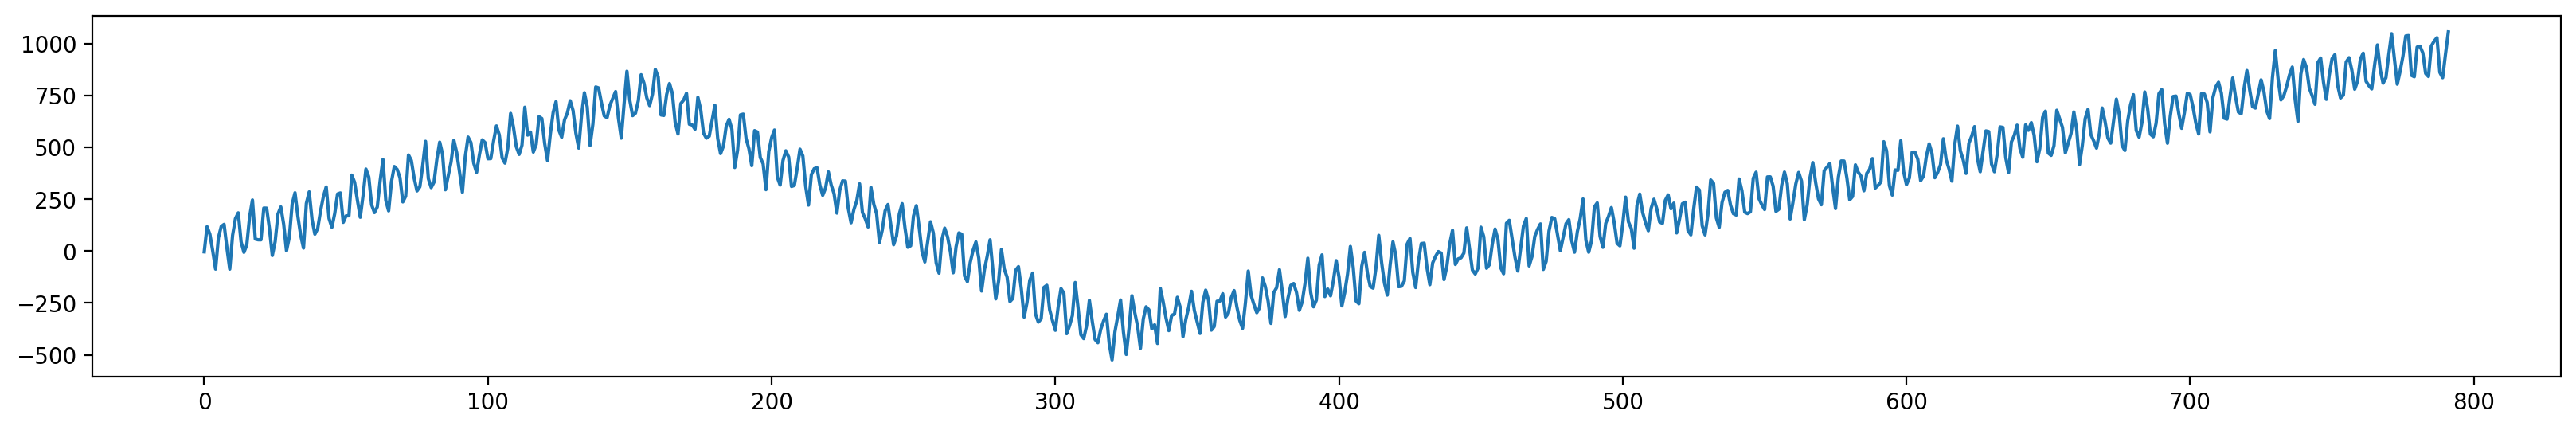

In [183]:
plt.figure(figsize = (20, 3), dpi = 200)
plt.plot(sin_time_series_noisy_piecewise_trended[6])

# AR

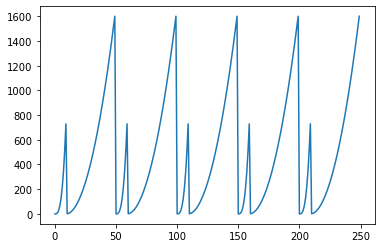

In [142]:
# Just a random pattern
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])

plt.plot(seasonal)

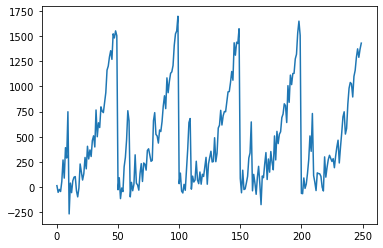

In [143]:
noise = np.random.randn(250)*100
seasonal += noise
plt.plot(seasonal)

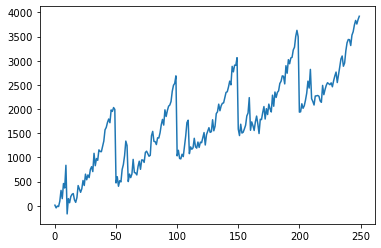

In [144]:
seasonal_upward = seasonal + np.arange(250)*10
plt.plot(seasonal_upward)

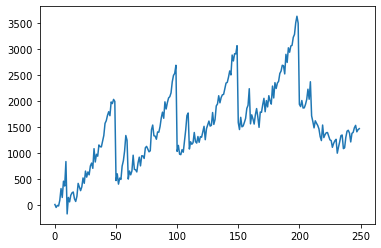

In [185]:
big_event = np.zeros(250)
big_event[-50:] = np.arange(50)*-50
non_stationary = seasonal_upward + big_event
plt.plot(non_stationary)